## Salary Prediction

### EDA

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings( 'ignore' )
plt.style.use("fivethirtyeight")

In [2]:
# Using a filtered dataframe to speed up the process
df = pd.read_csv("cagedmov2022-08-07-06.csv")

In [3]:
df.head(3)

,Unnamed: 0,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
0,902440,202208,3,35,355030,K,6542100,-1,212405,101,...,0,13000.0,9,0,1,202208,0,5,13000.0,Analista de Desenvolvimento de Sistemas
1,902441,202208,3,35,355030,N,8220200,-1,212405,101,...,0,11793.0,9,0,1,202208,0,5,11793.0,Analista de Desenvolvimento de Sistemas
2,902444,202208,3,35,355030,J,6201501,1,212405,101,...,9,11175.0,9,0,1,202208,0,5,11175.0,Analista de Desenvolvimento de Sistemas


In [4]:
df.sample(3)

,Unnamed: 0,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
7529,923934,202207,3,35,355030,N,8299799,-1,212405,101,...,0,9450.61,10,0,1,202207,0,5,9450.61,Analista de Desenvolvimento de Sistemas
16535,4876831,202207,3,35,355030,J,6201501,-1,212420,101,...,0,3600.00,4,0,1,202207,0,5,3600.00,Analista de Suporte Computacional
14284,943782,202206,3,35,355030,M,7020400,1,212405,101,...,9,4500.00,7,0,1,202206,0,5,4500.00,Analista de Desenvolvimento de Sistemas


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26423 entries, 0 to 26422
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              26423 non-null  int64  
 1   competênciamov          26423 non-null  int64  
 2   região                  26423 non-null  int64  
 3   uf                      26423 non-null  int64  
 4   município               26423 non-null  int64  
 5   seção                   26423 non-null  object 
 6   subclasse               26423 non-null  int64  
 7   saldomovimentação       26423 non-null  int64  
 8   cbo2002ocupação         26423 non-null  int64  
 9   categoria               26423 non-null  int64  
 10  graudeinstrução         26423 non-null  int64  
 11  idade                   26420 non-null  float64
 12  horascontratuais        26423 non-null  float64
 13  raçacor                 26423 non-null  int64  
 14  sexo                    26423 non-null

In [6]:
df.shape

(26423, 30)

In [7]:
df[["graudeinstrução"]].value_counts(sort = False) # Checking the frequency

graudeinstrução
2                    186
3                   3558
4                   4594
5                  14831
6                    417
7                    124
8                   2713
dtype: int64

In [8]:
df.head(3)

,Unnamed: 0,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
0,902440,202208,3,35,355030,K,6542100,-1,212405,101,...,0,13000.0,9,0,1,202208,0,5,13000.0,Analista de Desenvolvimento de Sistemas
1,902441,202208,3,35,355030,N,8220200,-1,212405,101,...,0,11793.0,9,0,1,202208,0,5,11793.0,Analista de Desenvolvimento de Sistemas
2,902444,202208,3,35,355030,J,6201501,1,212405,101,...,9,11175.0,9,0,1,202208,0,5,11175.0,Analista de Desenvolvimento de Sistemas


In [9]:
pd.DataFrame({'Columns': df.nunique().index , 'Number of unique values':  df.nunique().values})

,Columns,Number of unique values
0,Unnamed: 0,26423
1,competênciamov,3
2,região,1
3,uf,1
4,município,1
5,seção,19
6,subclasse,460
7,saldomovimentação,2
8,cbo2002ocupação,13
9,categoria,6


In [10]:
var_quant = [
    "idade", 
    "horascontratuais", 
    "salário", 
    "valorsaláriofixo"]

var_qua = [
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "unidadesaláriocódigo"
]

var_quali = [
    "região",
    "uf",
    "município",
    "seção",
    "subclasse",
    "categoria",
    "cbo2002ocupação",
    "graudeinstrução",
    "raçacor",
    "sexo",
    "tipoempregador",
    "tipoestabelecimento",
    "tipomovimentação",
    "tipodedeficiência",
    "indtrabintermitente",
    "indtrabparcial",
    "tamestabjan",
    "indicadoraprendiz",
    "origemdainformação",
    "competênciadec",
    "competênciaexc",
    "indicadordeexclusão",
    "indicadordeforadoprazo",
    "unidadesaláriocódigo"
]

label_quali = {
  "sexo": {1: 'M', 3: 'F', 9: 'Não Identificado'},
  "raçacor": {1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não informada', 9: 'Não Identificado'},
  "graudeinstrução": {1: "Analfabeto", 2: "Fund & Med Incompleto", 3: "Médio Completo", 4: "Superior Incompleto", 5: "Superior Completo", 6: "Mestrado", 7: "Doutorado", 8: "Pós completa", 99: "Não Identificado"},
  
}

In [11]:
def generate_plot(df, row, col):
    plt.figure(figsize=(25,40));
    for i, feat in enumerate(df):
        plt.subplot(row,col, i+1)
        if df[feat].dtypes == 'object':
            sns.countplot(y=df[feat])
            #plt.xticks(rotation=90)
            plt.tight_layout();
        else:
            sns.distplot(x=df[feat], color='c')
            plt.tight_layout();
            plt.xlabel(feat);

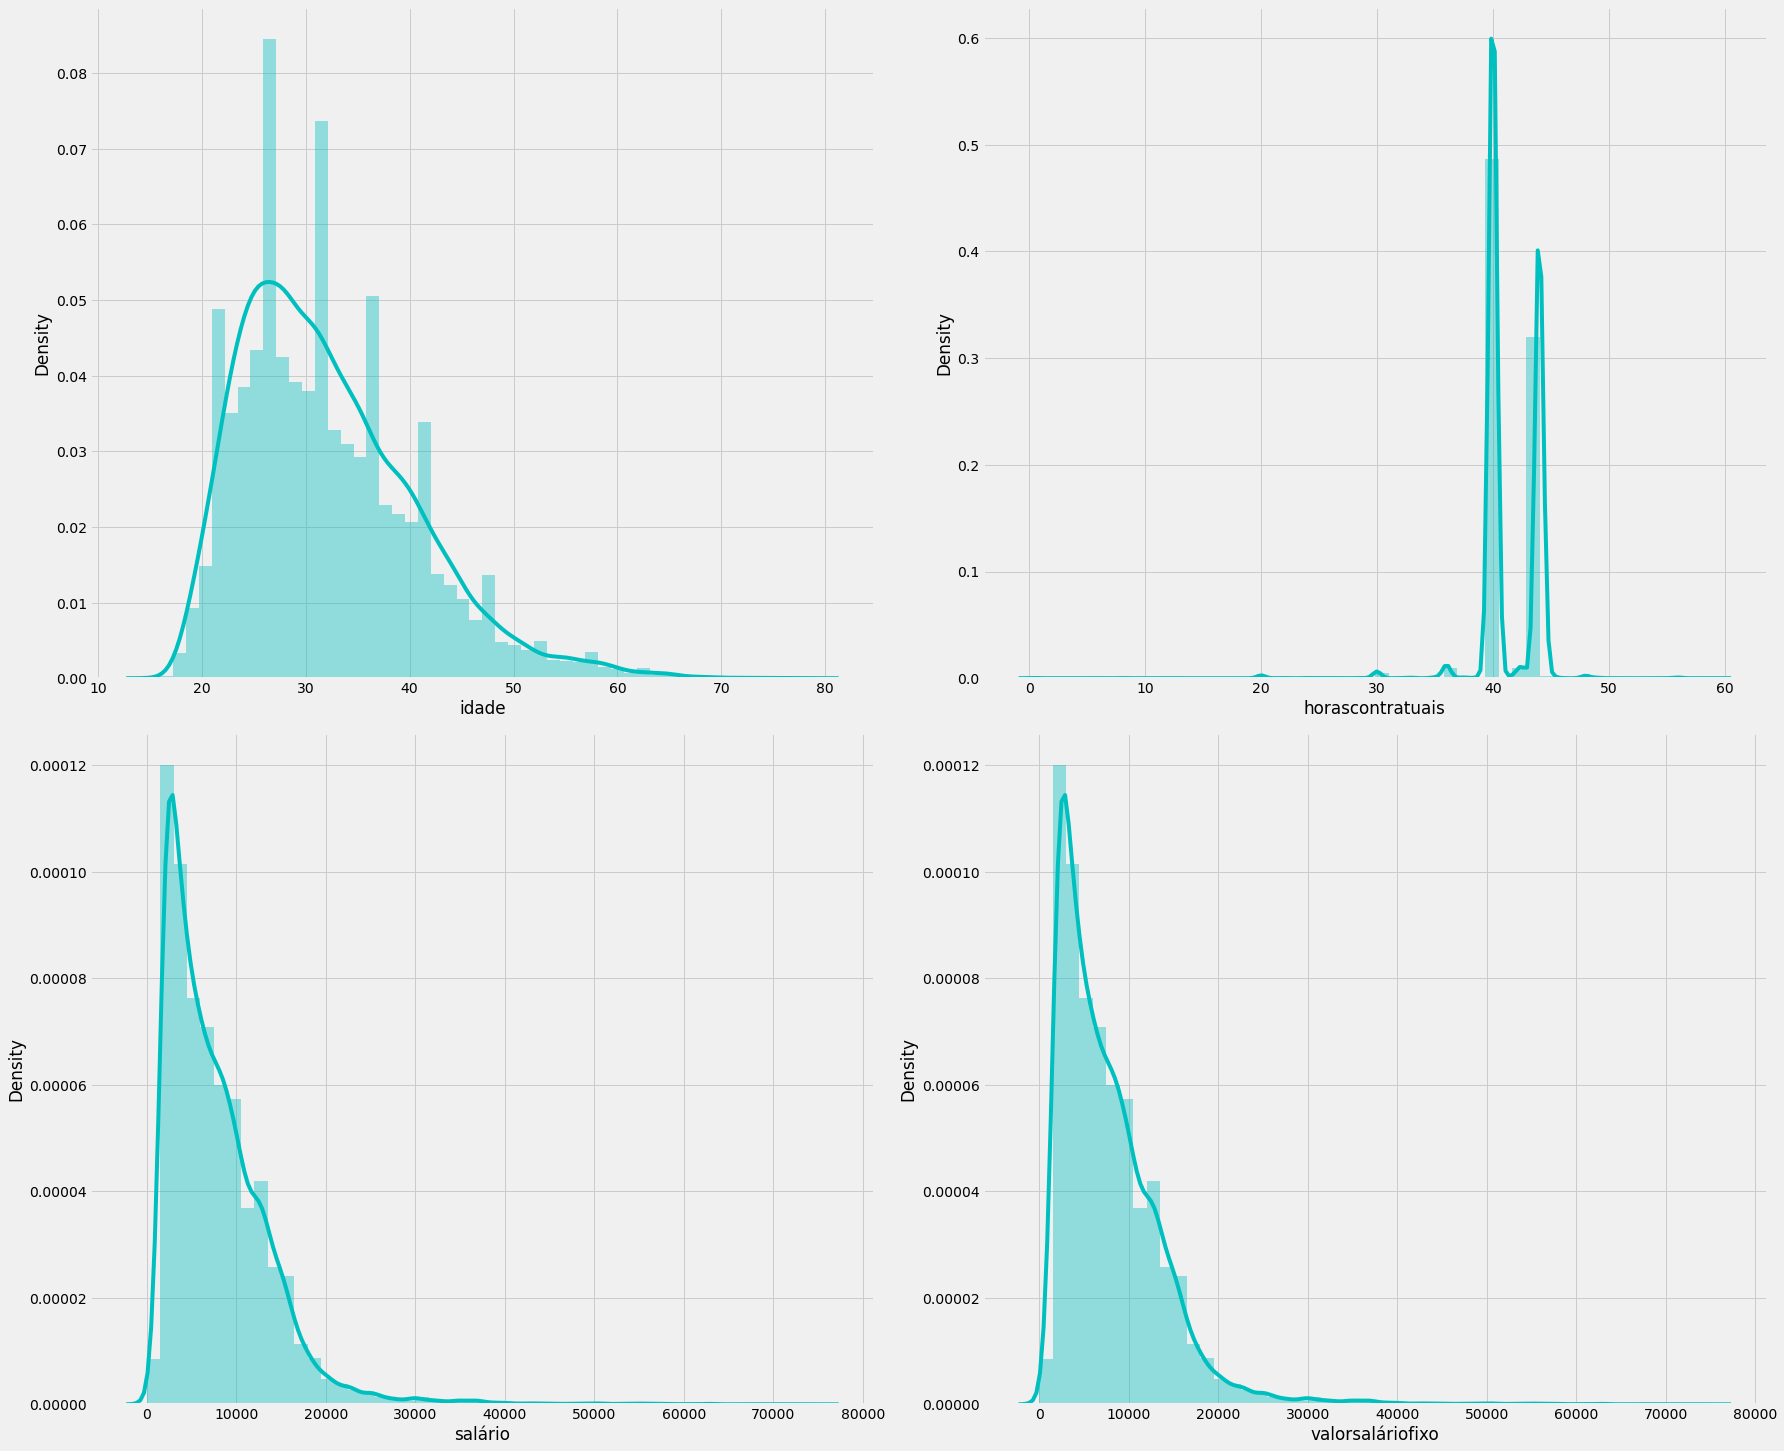

In [12]:
generate_plot(df[var_quant],4,2)

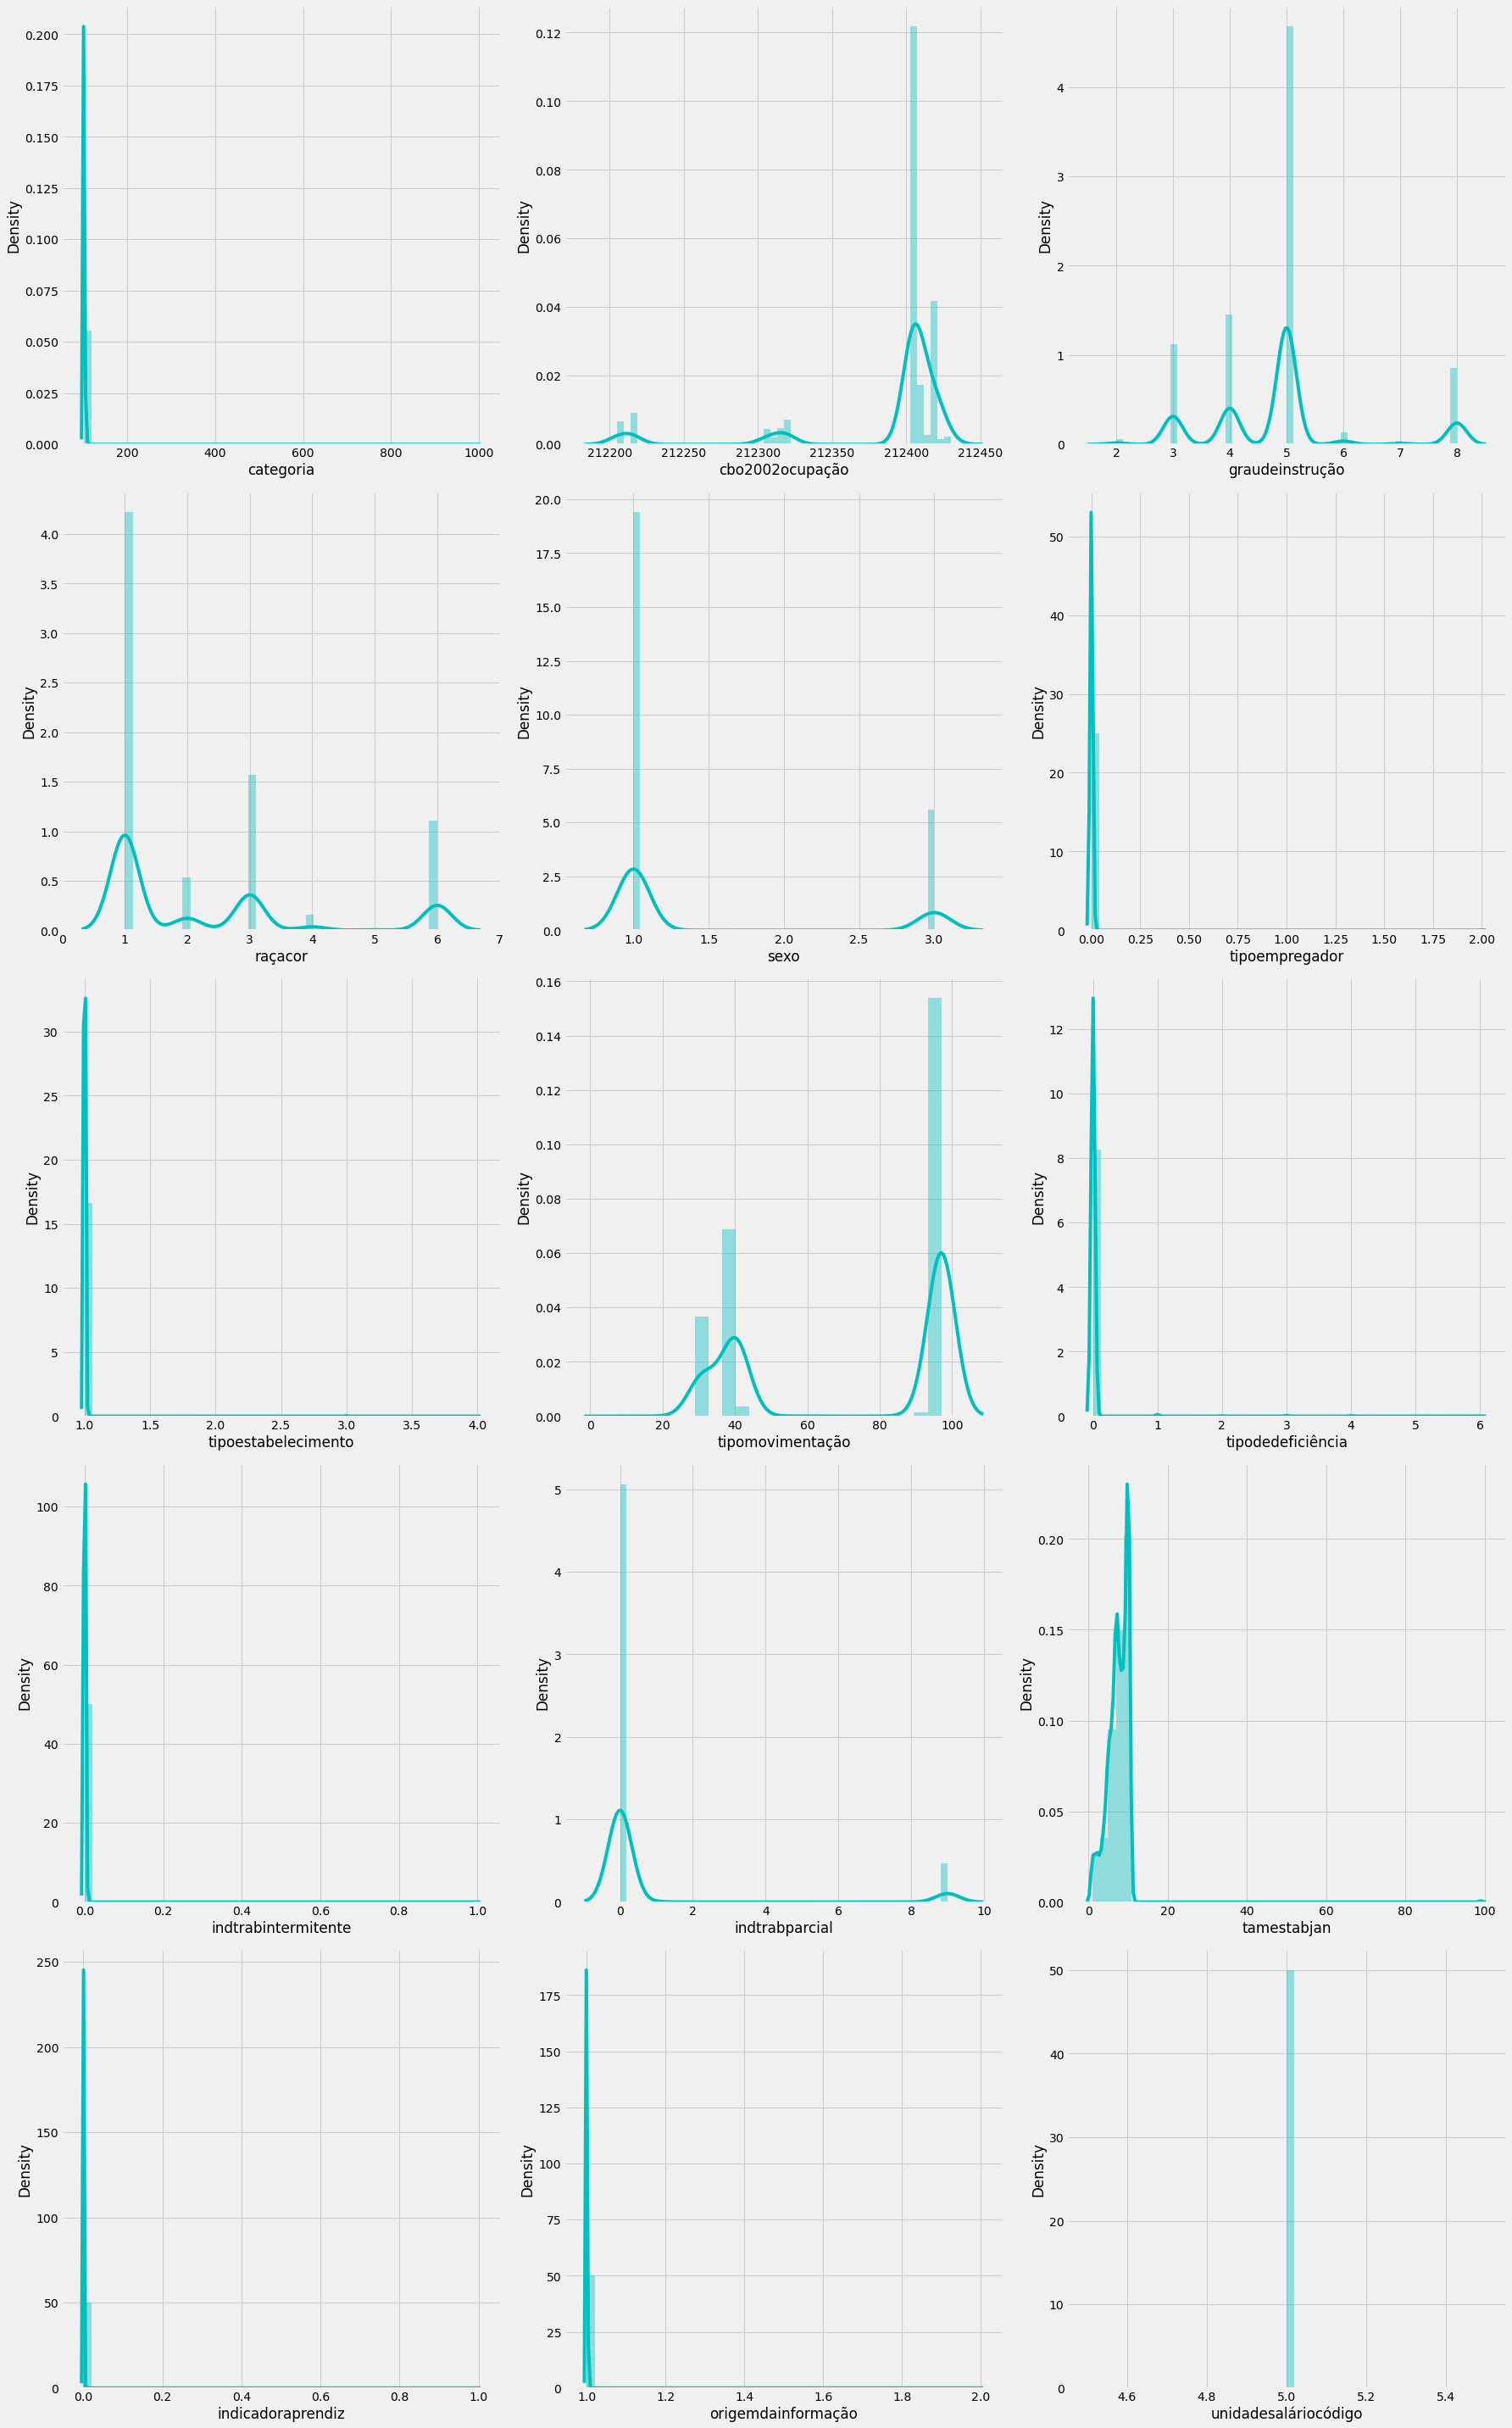

In [13]:
generate_plot(df[var_qua],5,3)

In [14]:
df[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
idade,26420.0,32.08,8.4,16.00,26.0,31.0,37.0,48.0,58.0,78.0
horascontratuais,26423.0,41.40,2.7,0.12,40.0,40.0,44.0,44.0,44.0,59.5
salário,26423.0,7826.45,5898.2,0.00,3500.0,6500.0,10600.0,17600.0,29143.4,75000.0
valorsaláriofixo,26423.0,7826.45,5898.2,0.00,3500.0,6500.0,10600.0,17600.0,29143.4,75000.0


In [15]:
# Employment category 101 = [CLT] 106 = [Temporary]
df.categoria.value_counts()

101    26018
106      305
105       79
111       11
999        6
103        4
Name: categoria, dtype: int64

In [16]:
# To put percentage numbers above chart ( With hue , Without hue)

def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [17]:
sns.set_palette('viridis')
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [18]:
# Boxplot function

def grafico_boxplot(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(y="valorsaláriofixo", x=variable, data=data, palette='viridis')
    plt.ylabel(label)
    plt.xticks(rotation = 90)
    plt.show()

In [19]:
# Barplot function

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = True)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion", palette='viridis'))

    plt.ylim(0,1)
    plt.xticks(rotation = 90)
    plt.show()

<AxesSubplot:xlabel='valorsaláriofixo'>

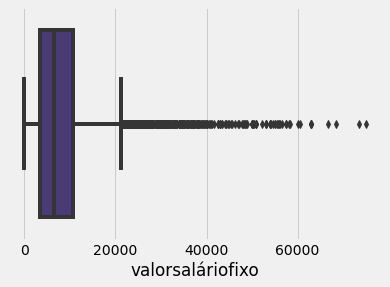

In [20]:
sns.boxplot(x=df.valorsaláriofixo)

In [21]:
df.nlargest(n=3, columns=['valorsaláriofixo'])

,Unnamed: 0,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
26390,10853198,202208,3,35,355030,N,7810800,1,212210,101,...,0,75000.00,7,0,1,202208,0,5,75000.00,Engenheiro de Equipamentos em Computacao
23336,9596289,202207,3,35,355030,N,7810800,-1,212215,101,...,0,73425.04,6,0,1,202207,0,5,73425.04,Engenheiros de Sistemas Operacionais em Comput...
23545,9596618,202207,3,35,355030,N,7810800,1,212215,101,...,0,68474.00,6,0,1,202207,0,5,68474.00,Engenheiros de Sistemas Operacionais em Comput...


In [22]:
df.nsmallest(n=3, columns=['valorsaláriofixo'])

,Unnamed: 0,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
3620,912720,202208,3,35,355030,J,6201501,1,212405,101,...,0,0.0,8,0,1,202208,0,5,0.0,Analista de Desenvolvimento de Sistemas
5951,919454,202207,3,35,355030,J,6209100,1,212405,101,...,0,0.0,5,0,1,202207,0,5,0.0,Analista de Desenvolvimento de Sistemas
12003,937015,202206,3,35,355030,N,7911200,1,212405,101,...,0,0.0,3,0,1,202206,0,5,0.0,Analista de Desenvolvimento de Sistemas


In [23]:
df['valorsaláriofixo'].value_counts()[0]

23

Z-Score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

In [24]:
# Interquartile range to detect outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 2.7 * IQR
    lower_limit = Q1 - 2.7 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "valorsaláriofixo")
print("Upper limit: ", upper)
print("Lower Limit: ", lower)

Upper limit:  29770.0
Lower Limit:  -15670.0


In [25]:
# Standard deviation to detect outliers
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
upper_limit, lower_limit = outlier_removal(df, "valorsaláriofixo")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  25521.051681381865
Lower Limit:  -9868.153249712468


In [26]:
df[(df['valorsaláriofixo'] < lower_limit) | (df['valorsaláriofixo'] > upper_limit)]

,Unnamed: 0,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
240,903158,202208,3,35,355030,N,8211300,-1,212405,101,...,0,27375.00,9,0,1,202208,0,5,27375.00,Analista de Desenvolvimento de Sistemas
317,903350,202208,3,35,355030,N,8211300,1,212405,101,...,9,30000.00,1,0,1,202208,0,5,30000.00,Analista de Desenvolvimento de Sistemas
338,903406,202208,3,35,355030,N,8220200,-1,212405,101,...,0,27000.00,10,0,1,202208,0,5,27000.00,Analista de Desenvolvimento de Sistemas
397,903558,202208,3,35,355030,J,6204000,-1,212405,101,...,0,44316.67,9,0,1,202208,0,5,44316.67,Analista de Desenvolvimento de Sistemas
527,903867,202208,3,35,355030,J,6204000,1,212405,101,...,0,30000.00,9,0,1,202208,0,5,30000.00,Analista de Desenvolvimento de Sistemas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26390,10853198,202208,3,35,355030,N,7810800,1,212210,101,...,0,75000.00,7,0,1,202208,0,5,75000.00,Engenheiro de Equipamentos em Computacao
26393,10853208,202208,3,35,355030,P,8532500,-1,212210,101,...,0,29120.00,9,0,1,202208,0,5,29120.00,Engenheiro de Equipamentos em Computacao
26397,10853233,202207,3,35,355030,J,6319400,1,212210,101,...,0,32000.00,1,0,1,202207,0,5,32000.00,Engenheiro de Equipamentos em Computacao
26401,10853246,202207,3,35,355030,J,6203100,-1,212210,101,...,0,32000.50,7,0,1,202207,0,5,32000.50,Engenheiro de Equipamentos em Computacao


In [27]:
# Filtering salary values >= R$ 1212 Brazilian Minimal Wage & <= upper
df = df[(df.valorsaláriofixo >= 1212) & (df['valorsaláriofixo'] < upper)]
df.head(3)

,Unnamed: 0,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,Descrição
0,902440,202208,3,35,355030,K,6542100,-1,212405,101,...,0,13000.0,9,0,1,202208,0,5,13000.0,Analista de Desenvolvimento de Sistemas
1,902441,202208,3,35,355030,N,8220200,-1,212405,101,...,0,11793.0,9,0,1,202208,0,5,11793.0,Analista de Desenvolvimento de Sistemas
2,902444,202208,3,35,355030,J,6201501,1,212405,101,...,9,11175.0,9,0,1,202208,0,5,11175.0,Analista de Desenvolvimento de Sistemas


In [28]:
df.shape

(26069, 30)

<AxesSubplot:xlabel='valorsaláriofixo'>

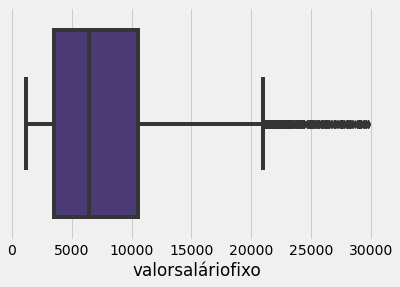

In [29]:
sns.boxplot(x=df.valorsaláriofixo)

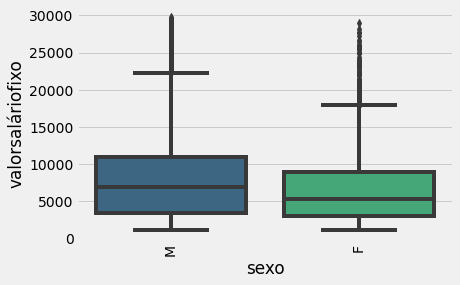

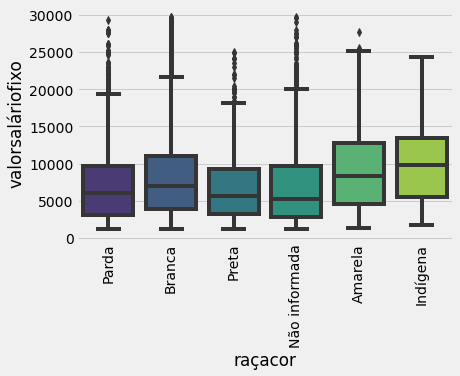

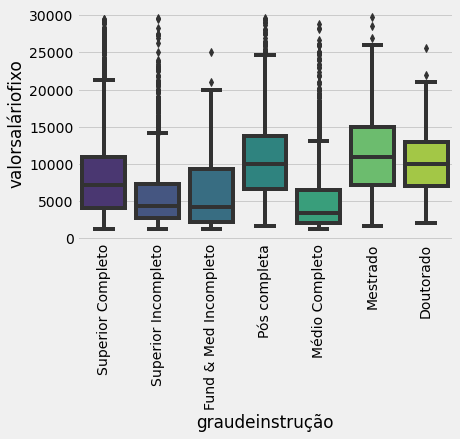

In [30]:
grafico_boxplot(df.replace(label_quali), "sexo", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "raçacor", "valorsaláriofixo")
grafico_boxplot(df.replace(label_quali), "graudeinstrução", "valorsaláriofixo")

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='idade'>

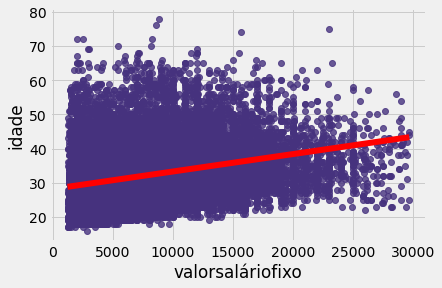

In [31]:
sns.regplot(x=df.valorsaláriofixo , y=df.idade, line_kws={'color': 'red'})

<AxesSubplot:xlabel='valorsaláriofixo', ylabel='graudeinstrução'>

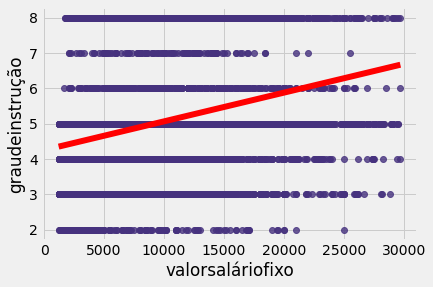

In [32]:
sns.regplot(x=df.valorsaláriofixo , y=df.graudeinstrução, line_kws={'color': 'red'})

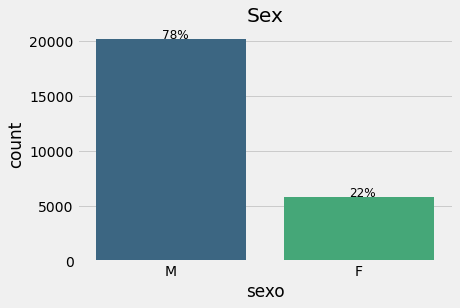

In [33]:
ax = sns.countplot( x=df.replace(label_quali).sexo , data= df, palette='viridis')
ax.set_title('Sex')
percen(ax , df.sexo)

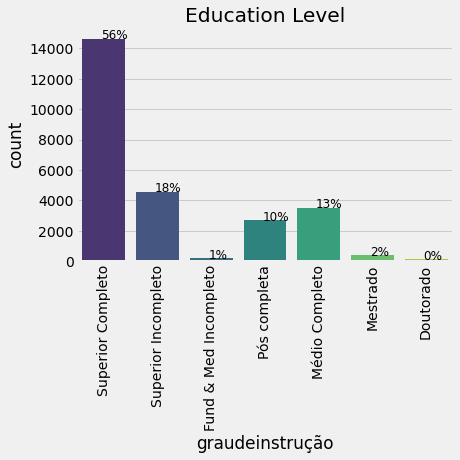

In [34]:
ax = sns.countplot( x='graudeinstrução' , data= df.replace(label_quali), palette='viridis')
ax.set_title('Education Level')
plt.xticks(rotation = 90)
percen(ax , df.graudeinstrução)

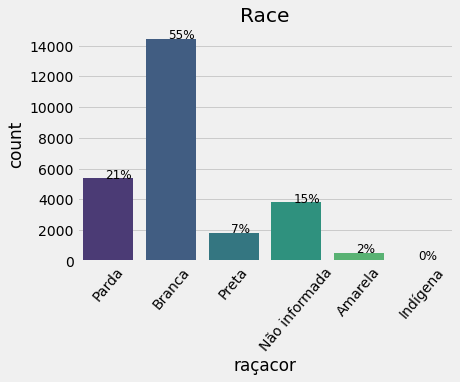

In [35]:
ax = sns.countplot( x='raçacor' , data= df.replace(label_quali), palette='viridis')
ax.set_title('Race')
plt.xticks(rotation = 50)
percen(ax , df.raçacor)

In [36]:
df.replace(label_quali).raçacor.value_counts()

Branca           14449
Parda             5389
Não informada     3810
Preta             1820
Amarela            523
Indígena            78
Name: raçacor, dtype: int64

<AxesSubplot:title={'center':'Average Salary by Race'}, xlabel='raçacor', ylabel='valorsaláriofixo'>

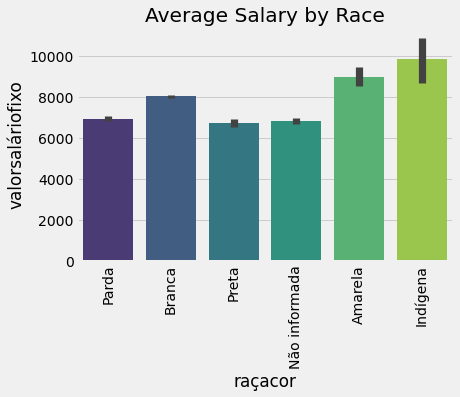

In [37]:
plt.title('Average Salary by Race')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali), x="raçacor", y="valorsaláriofixo", palette='viridis')

Text(0.5, 1.0, 'Salaries ratio for Male/Female')

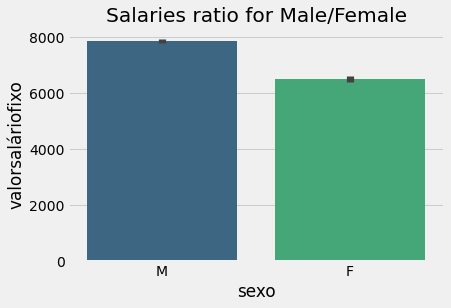

In [38]:
ax = sns.barplot(data=df.replace(label_quali), x="sexo", y="valorsaláriofixo", palette='viridis')
ax.set_title('Salaries ratio for Male/Female')

<AxesSubplot:title={'center':'Average Salary by Education Level'}, xlabel='graudeinstrução', ylabel='valorsaláriofixo'>

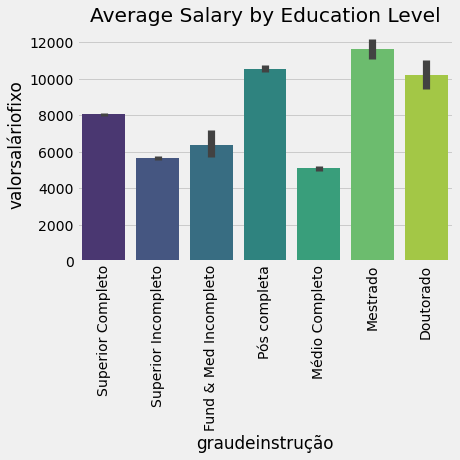

In [39]:
plt.title('Average Salary by Education Level')
plt.xticks(rotation = 90)
sns.barplot(data=df.replace(label_quali),  x="graudeinstrução", y="valorsaláriofixo", palette='viridis')

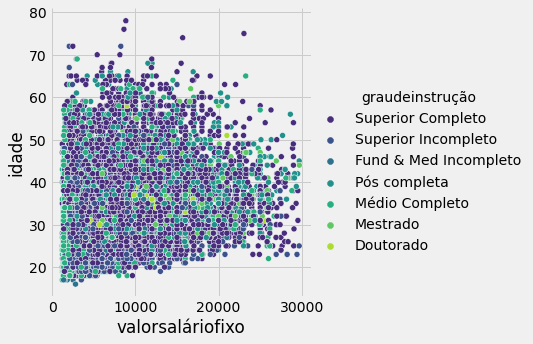

In [40]:
sns.relplot(data=df.replace(label_quali), x='valorsaláriofixo', y='idade', hue='graudeinstrução', palette='viridis')

In [41]:
pd.DataFrame({'Education Level': df.replace(label_quali).groupby('graudeinstrução')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('graudeinstrução')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1].head(10)

,Education Level,Mean salary
4,Pós completa,11624.20
6,Superior Incompleto,10566.73
5,Superior Completo,10205.93
3,Médio Completo,8063.95
0,Doutorado,6392.43
2,Mestrado,5665.92
1,Fund & Med Incompleto,5099.70


In [42]:
df.replace(label_quali).graudeinstrução.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Superior Completo        56.09 %
Superior Incompleto      17.51 %
Médio Completo           13.49 %
Pós completa             10.25 %
Mestrado                  1.51 %
Fund & Med Incompleto      0.7 %
Doutorado                 0.45 %
Name: graudeinstrução, dtype: object

In [43]:
df.replace(label_quali).graudeinstrução.value_counts()

Superior Completo        14623
Superior Incompleto       4564
Médio Completo            3516
Pós completa              2673
Mestrado                   393
Fund & Med Incompleto      182
Doutorado                  118
Name: graudeinstrução, dtype: int64

<AxesSubplot:>

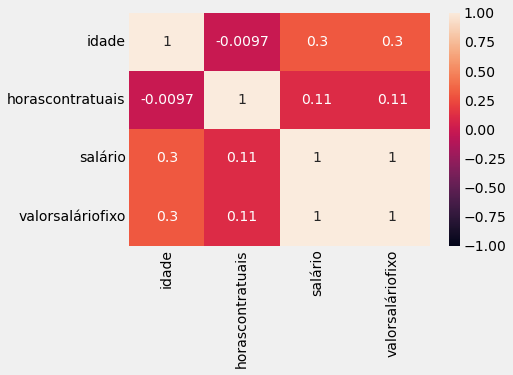

In [44]:
sns.heatmap(data=df[var_quant].corr(), annot=True, vmin=-1, vmax=1 )

<AxesSubplot:>

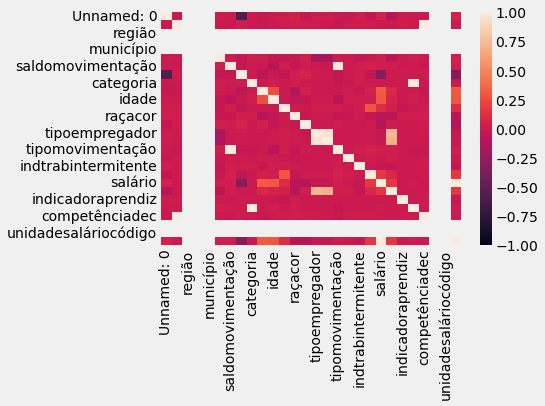

In [45]:
sns.heatmap(data=df.corr(), vmin=-1, vmax=1 )

<AxesSubplot:title={'center':'Occupattion'}, xlabel='Descrição', ylabel='valorsaláriofixo'>

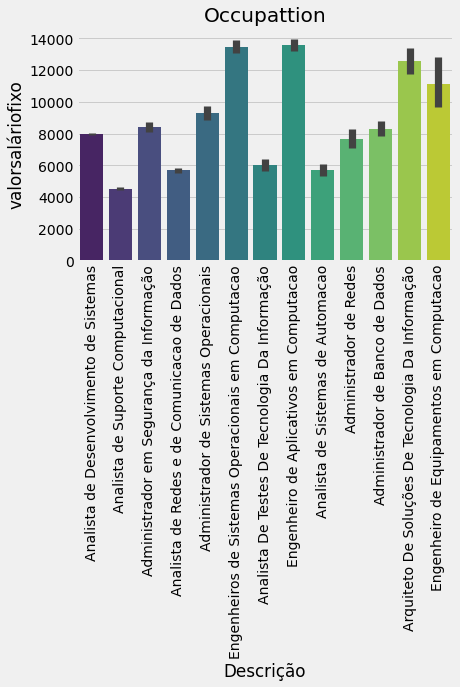

In [46]:
plt.xticks(rotation = 90)
plt.title('Occupattion')
sns.barplot(data=df.replace(label_quali), x="Descrição", y="valorsaláriofixo", palette='viridis')

In [47]:
pd.DataFrame({'Occupattion': df.groupby('Descrição')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('Descrição')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Occupattion,Mean salary
10,Engenheiro de Aplicativos em Computacao,13573.14
12,Engenheiros de Sistemas Operacionais em Comput...,13460.69
9,Arquiteto De Soluções De Tecnologia Da Informação,12543.46
11,Engenheiro de Equipamentos em Computacao,11115.79
2,Administrador de Sistemas Operacionais,9294.97
3,Administrador em Segurança da Informação,8428.74
0,Administrador de Banco de Dados,8314.81
5,Analista de Desenvolvimento de Sistemas,7990.65
1,Administrador de Redes,7665.23
4,Analista De Testes De Tecnologia Da Informação,6004.41


In [48]:
df.Descrição.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'

Analista de Desenvolvimento de Sistemas               55.39 %
Analista de Suporte Computacional                     18.79 %
Analista de Redes e de Comunicacao de Dados             7.8 %
Engenheiros de Sistemas Operacionais em Computacao     3.64 %
Administrador em Segurança da Informação               3.22 %
Engenheiro de Aplicativos em Computacao                2.85 %
Administrador de Sistemas Operacionais                  2.2 %
Administrador de Banco de Dados                        2.04 %
Analista de Sistemas de Automacao                      1.26 %
Analista De Testes De Tecnologia Da Informação          1.0 %
Administrador de Redes                                 0.98 %
Arquiteto De Soluções De Tecnologia Da Informação      0.65 %
Engenheiro de Equipamentos em Computacao               0.16 %
Name: Descrição, dtype: object

In [49]:
pd.DataFrame({'Age': df.groupby('idade')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('idade')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]


,Age,Mean salary
57,75.0,23048.59
56,74.0,15681.54
44,60.0,11333.09
52,68.0,10872.46
50,66.0,10797.86
46,62.0,10318.06
32,48.0,10161.34
42,58.0,10124.59
33,49.0,10118.70
38,54.0,10101.06


In [50]:
pd.DataFrame({'Weekly working hours': df.groupby('horascontratuais')['valorsaláriofixo'].mean().index , 'Mean salary':  df.groupby('horascontratuais')['valorsaláriofixo'].mean().round(2).values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Weekly working hours,Mean salary
28,35.20,21532.80
79,48.00,16784.99
75,44.92,14000.00
47,41.00,11563.01
45,40.80,11413.34
...,...,...
9,17.60,1750.00
19,28.75,1403.40
18,28.33,1351.00
65,43.67,1252.00


### Modeling

####  Train Test Split

In [52]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [53]:
features = ['idade','graudeinstrução','raçacor','sexo','horascontratuais']
X = df.loc[:, features]
y = df.loc[:, ['valorsaláriofixo']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [55]:
X_train.shape

(19551, 5)

In [56]:
X_test.shape

(6518, 5)

In [51]:
(df.isna().sum() / len(df)) * 100

Unnamed: 0                0.000000
competênciamov            0.000000
região                    0.000000
uf                        0.000000
município                 0.000000
seção                     0.000000
subclasse                 0.000000
saldomovimentação         0.000000
cbo2002ocupação           0.000000
categoria                 0.000000
graudeinstrução           0.000000
idade                     0.011508
horascontratuais          0.000000
raçacor                   0.000000
sexo                      0.000000
tipoempregador            0.000000
tipoestabelecimento       0.000000
tipomovimentação          0.000000
tipodedeficiência         0.000000
indtrabintermitente       0.000000
indtrabparcial            0.000000
salário                   0.000000
tamestabjan               0.000000
indicadoraprendiz         0.000000
origemdainformação        0.000000
competênciadec            0.000000
indicadordeforadoprazo    0.000000
unidadesaláriocódigo      0.000000
valorsaláriofixo    

In [ ]:
df['horascontratuais'].isnull().sum()

In [ ]:
# Fill NaN values by MODE

df['horascontratuais'].fillna(df['horascontratuais'].value_counts().idxmax() , axis=0 ,inplace=True)